In [22]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from random import random, randint
from time import time

In [7]:
data = pd.read_csv('c:/users/mans/Dataset.csv')
data.head()

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0


In [9]:
data.describe()

,Capacity,Best price
count,10000.000000,10000.000000
mean,57.203100,30.930800
std,24.573377,13.638688
min,15.000000,0.000000
25%,36.000000,20.000000
50%,57.000000,31.000000
75%,78.000000,40.000000
max,99.000000,82.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Weights     10000 non-null  object 
 1   Prices      10000 non-null  object 
 2   Capacity    10000 non-null  int64  
 3   Best picks  9879 non-null   object 
 4   Best price  10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [12]:
data.apply(lambda x: len(x.unique()))

Weights       9999
Prices        9973
Capacity        85
Best picks      32
Best price      79
dtype: int64

In [13]:
data.isnull().sum()

Weights         0
Prices          0
Capacity        0
Best picks    121
Best price      0
dtype: int64

In [23]:
weights = data['Weights'].apply(lambda x: np.fromstring(x[1:-1], dtype=int, sep=' '))
prices = data['Prices'].apply(lambda x: np.fromstring(x[1:-1], dtype=int, sep=' '))
capacity = data['Capacity']
best_price = data['Best price']

In [24]:
def knapsack_value(weights, prices, capacity, picks):
    total_weight = np.sum(weights * picks)
    total_price = np.sum(prices * picks)
    if total_weight <= capacity:
        return total_price
    else:
        return 0

In [25]:
# تطبيق خوارزمية "Mountain Gazelle Optimizer"
def knapsack_optimizer(weights, prices, capacity, generations=100, population_size=50):
    best_fitness = float('-inf')
    best_solution = None
    
    for _ in range(population_size):
        solution = [randint(0, 1) for _ in range(len(weights))]
        fitness = knapsack_value(weights, prices, capacity, solution)
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    
    return best_solution, best_fitness

best_solutions = []
best_fitnesses = []

for i in range(len(weights)):
    best_solution, best_fitness = knapsack_optimizer(weights[i], prices[i], capacity[i])
    best_solutions.append(best_solution)
    best_fitnesses.append(best_fitness)


In [26]:
for i in range(len(weights)):
    print(f"حقيبة رقم {i+1}:")
    print(f"الحل المكتشف: {best_solutions[i]}")
    print(f"أفضل قيمة ممكنة: {best_fitnesses[i]}")
    print(f"القيمة الفعلية: {best_price[i]}")
    print()

حقيبة رقم 1:
الحل المكتشف: [0, 0, 0, 1, 0]
أفضل قيمة ممكنة: 15
القيمة الفعلية: 19.0

حقيبة رقم 2:
الحل المكتشف: [1, 1, 1, 1, 1]
أفضل قيمة ممكنة: 47
القيمة الفعلية: 47.0

حقيبة رقم 3:
الحل المكتشف: [1, 0, 1, 0, 0]
أفضل قيمة ممكنة: 35
القيمة الفعلية: 36.0

حقيبة رقم 4:
الحل المكتشف: [1, 0, 0, 0, 0]
أفضل قيمة ممكنة: 19
القيمة الفعلية: 19.0

حقيبة رقم 5:
الحل المكتشف: [0, 1, 1, 1, 0]
أفضل قيمة ممكنة: 44
القيمة الفعلية: 44.0

حقيبة رقم 6:
الحل المكتشف: [1, 1, 0, 1, 0]
أفضل قيمة ممكنة: 48
القيمة الفعلية: 48.0

حقيبة رقم 7:
الحل المكتشف: [0, 1, 0, 1, 1]
أفضل قيمة ممكنة: 33
القيمة الفعلية: 37.0

حقيبة رقم 8:
الحل المكتشف: [0, 1, 0, 0, 0]
أفضل قيمة ممكنة: 7
القيمة الفعلية: 13.0

حقيبة رقم 9:
الحل المكتشف: [1, 0, 1, 1, 0]
أفضل قيمة ممكنة: 35
القيمة الفعلية: 35.0

حقيبة رقم 10:
الحل المكتشف: [1, 1, 0, 1, 1]
أفضل قيمة ممكنة: 45
القيمة الفعلية: 45.0

حقيبة رقم 11:
الحل المكتشف: [1, 1, 1, 1, 1]
أفضل قيمة ممكنة: 44
القيمة الفعلية: 44.0

حقيبة رقم 12:
الحل المكتشف: [1, 0, 1, 1, 0]
أفضل قيمة ممكنة: 43


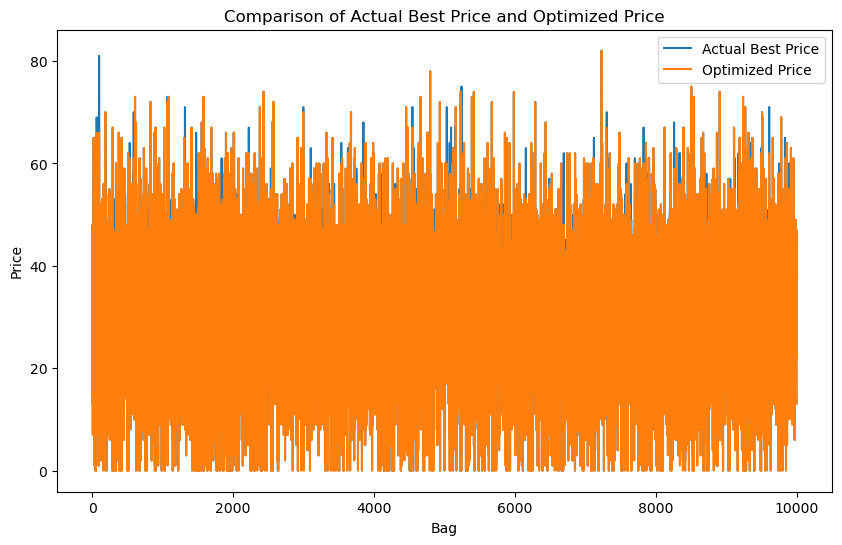

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(best_price, label='Actual Best Price')
plt.plot(best_fitnesses, label='Optimized Price')
plt.xlabel('Bag')
plt.ylabel('Price')
plt.title('Comparison of Actual Best Price and Optimized Price')
plt.legend()
plt.show()

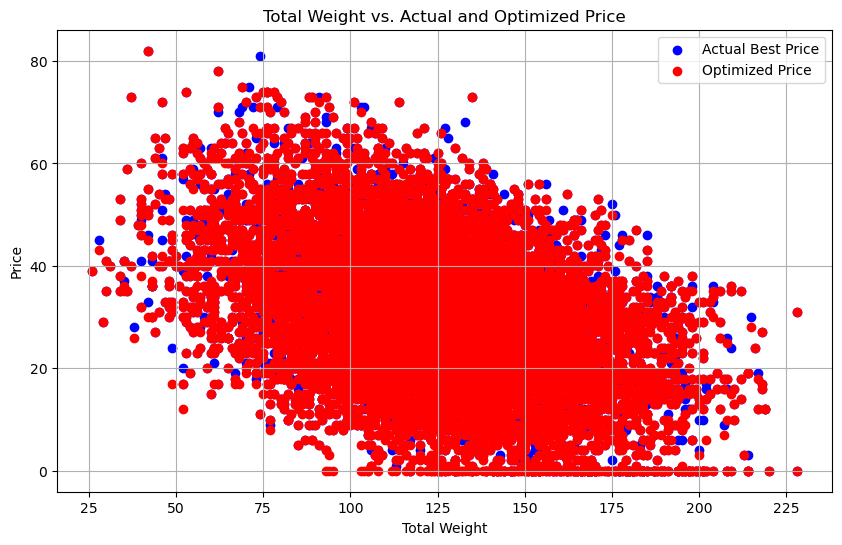

In [29]:
total_weights = [np.sum(weights[i]) for i in range(len(weights))]

plt.figure(figsize=(10, 6))
plt.scatter(total_weights, best_price, label='Actual Best Price', color='blue')
plt.scatter(total_weights, best_fitnesses, label='Optimized Price', color='red')
plt.xlabel('Total Weight')
plt.ylabel('Price')
plt.title('Total Weight vs. Actual and Optimized Price')
plt.legend()
plt.grid(True)
plt.show()


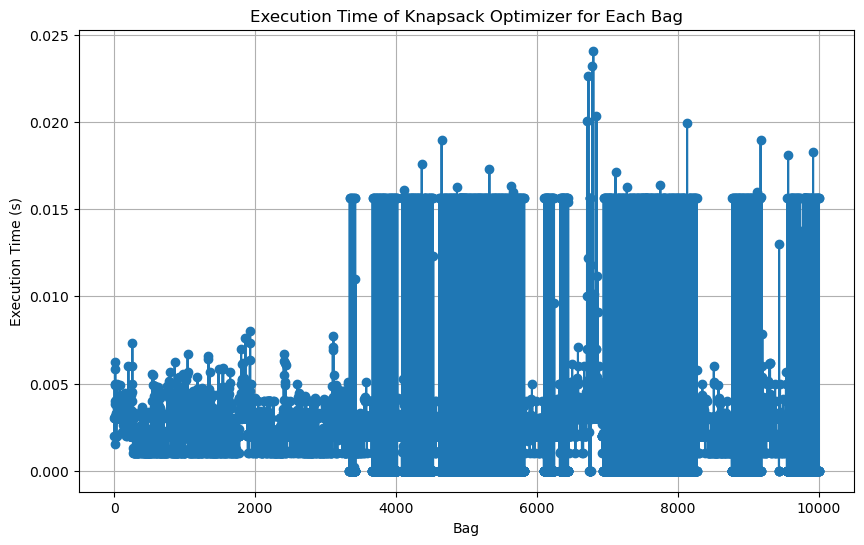

In [30]:
def knapsack_optimizer_timed(weights, prices, capacity, generations=100, population_size=50):
    start_time = time()
    best_fitness = float('-inf')
    best_solution = None
    
    for _ in range(population_size):
        solution = [randint(0, 1) for _ in range(len(weights))]
        fitness = knapsack_value(weights, prices, capacity, solution)
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    
    end_time = time()
    execution_time = end_time - start_time
    
    return best_solution, best_fitness, execution_time

execution_times = []

for i in range(len(weights)):
    _, _, execution_time = knapsack_optimizer_timed(weights[i], prices[i], capacity[i])
    execution_times.append(execution_time)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(weights) + 1), execution_times, marker='o')
plt.xlabel('Bag')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Knapsack Optimizer for Each Bag')
plt.grid(True)
plt.show()


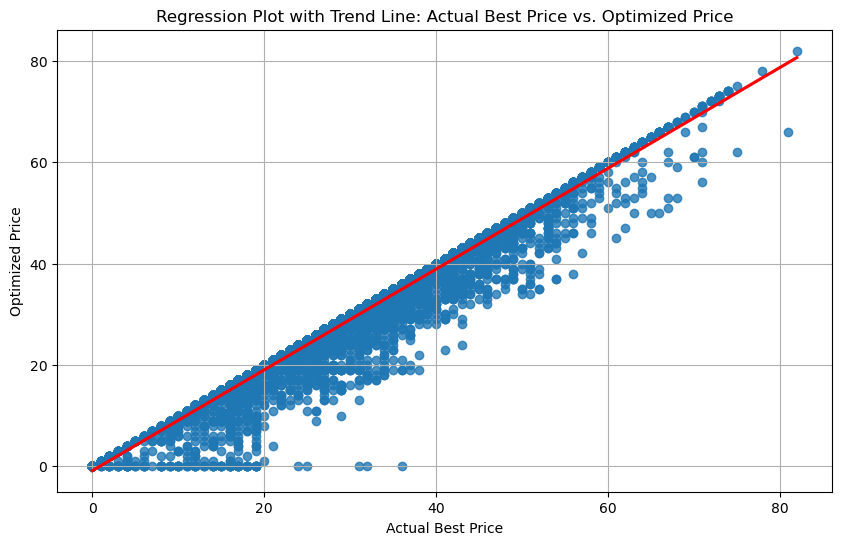

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x=best_price, y=best_fitnesses, ci=None, line_kws={'color': 'red'})
plt.xlabel('Actual Best Price')
plt.ylabel('Optimized Price')
plt.title('Regression Plot with Trend Line: Actual Best Price vs. Optimized Price')
plt.grid(True)
plt.show()


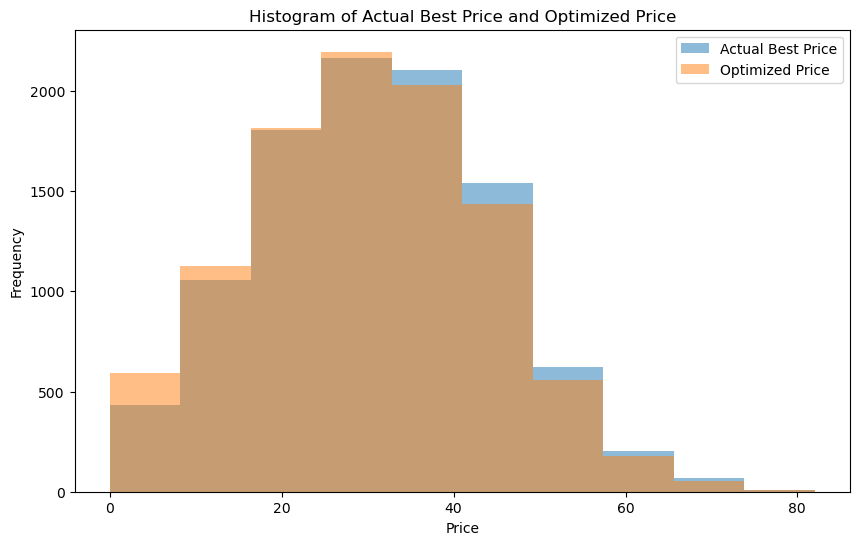

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(best_price, bins=10, alpha=0.5, label='Actual Best Price')
plt.hist(best_fitnesses, bins=10, alpha=0.5, label='Optimized Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Best Price and Optimized Price')
plt.legend()
plt.show()


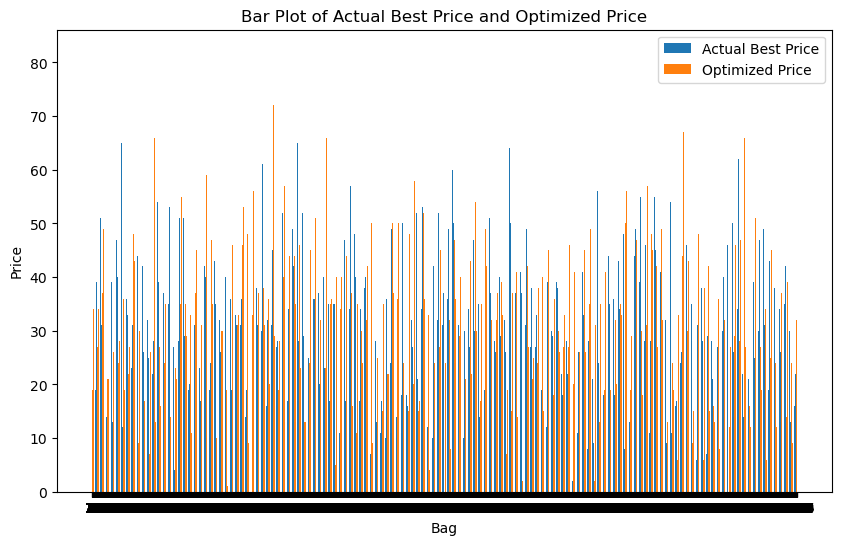

In [35]:
plt.figure(figsize=(10, 6))
x = np.arange(len(best_price))
bar_width = 0.35
plt.bar(x - bar_width/2, best_price, bar_width, label='Actual Best Price')
plt.bar(x + bar_width/2, best_fitnesses, bar_width, label='Optimized Price')
plt.xlabel('Bag')
plt.ylabel('Price')
plt.title('Bar Plot of Actual Best Price and Optimized Price')
plt.xticks(x)
plt.legend()
plt.show()


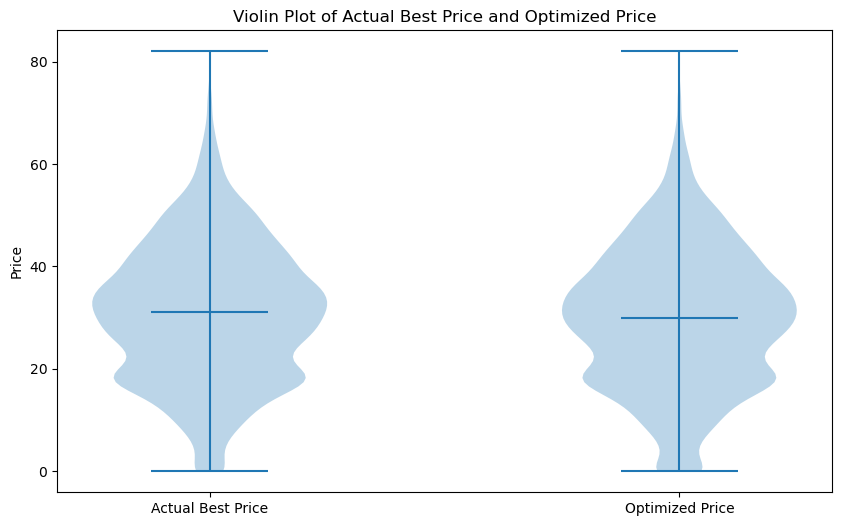

In [36]:
plt.figure(figsize=(10, 6))
plt.violinplot([best_price, best_fitnesses], showmeans=False, showmedians=True)
plt.xticks([1, 2], ['Actual Best Price', 'Optimized Price'])
plt.ylabel('Price')
plt.title('Violin Plot of Actual Best Price and Optimized Price')
plt.show()
